 <h1 align = center> Principles of Object Oriented Programming </h1>

#### 4 principles
- Encapsulation
- Abstraction
- Inheritance
- Polymorphism


## 1 ENCAPSULATION

In encapsulation, the variables of a class can be made hidden from other classes, and can be accessed only through the methods of their current class. Therefore, it is also known as data hiding.
<br><br>
Encapsulation can be described as a protective barrier that prevents the code and data being randomly accessed by other code defined outside the class. Access to the data and code is tightly controlled by a class.

In [1]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'


In [2]:
class My_Video():
    
    def __init__(self, title, quality, duration, cast, genre, captioning):
        self.quality = quality 
        self.duration = duration
        self.cast = cast
        self.title = title
        self.genre = genre
        self.captioning = captioning 
        
    def change_video(self):
        new_show = input("What would you like to watch?")
        self.title = new_show
        print(f"You are now wathching, {self.title}!!")
        
    def add_cast(self):
        cast_switch = input("Which cast would you like add: ")
        self.cast.append(cast_switch)
        print(f"The {self.title} has now a new member {cast_switch}. Welcome {cast_switch}!")
    def control_captioning(self):
        if self.captioning == True:
            self.captioning = False
            print("Captions are now turned off")
        elif self.captioning == False:
            self.captioning = True
            print("Captions are now turned on")
            
    def limited_bandwidth(self):
        self.quality = '480p'
        print(f"Due to limited bandwidth, the max quality you can stream is {self.quality}")
    def change_quality(self):
        new_quality = input("What quality would you like? ")
        self.quality = new_quality
        print(f"Your video is now in {self.quality}p! Look at that picture!")

    
        
new_video = My_Video("Cool Video","1080p","90 mins", ["Alex", "Ryan", "Nate", "Tenzin", "Kayla", "John"], "Spooky", True)

print(new_video.title)

new_video.change_video()
new_video.control_captioning()
new_video.limited_bandwidth()
new_video.add_cast()
new_video.change_quality()

Cool Video


KeyboardInterrupt: Interrupted by user

In [ ]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'


In [ ]:
# attributes from instances are unique to that instance
# attributes are protected and only to be accessed by class methods
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

class Video():
    
    
    def __init__(self):
        self.title = None
        self.length = timedelta() 
        self.link = generic_image
        
    def play(self):
        print(f"now playing {self.title}")
        display(Image(self.link))
    def pause(self):
        print("video paused")
        
    def __repr__(self):
        return f"{self.title} is {self.length.seconds} seconds long. "
    
        

## 2 ABSTRACTION

Abstraction is a process of hiding the implementation details from the user, only the functionality will be provided to the user.
<br><br>


In [ ]:

class Episode(Video):
    def __init__(self,data):
        Video.__init__(self)
        self.number = data['number']
        self.season = data['season']
        self.date_aired = data['airdate']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.title = data['name']
        self.length = timedelta(minutes = data['runtime'])
        if data['image']:
            self.link = data['image']['medium']
        else:
            self.link = generic_image
            
            

## 3 INHERITENCE

Inheritance can be defined as the process where one class acquires the properties (methods and fields) of another.
<br>
<i>(see above)</i>

In [ ]:

class Series():
    def __init__(self):
        self.id = None
        self.network = None
        self.seasons = None
        self.summary = None
        self.title = None
        self.genres = []
        self.episodes = []
        
    def get_info(self, query = ""):
        data = None #<-- in case the show doesn't come back
        while not data:
            if not query:
                query = input("What is the name of the series?")
                r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
                if r.status_code == 200:
                    data = r.json()
                    print(data)
                else:
                    print(f"Series error: status code {r.status_code}")
                    query = ""
                    
            else:
                r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
                if r.status_code == 200:
                    data = r.json()
                else:
                    print(f"Series Error: status code: {r.status_code}")
                    query = ''
            
                    
        # Use data to build out our attributes
        self.id = data['id']
        self.title = data['name']
        self.summary = data['summary']
        self.genres = [genre for genre in data['genres']]
        if data['network']:
            self.network = data['network']['name']
        else:
            self.network = data['webChannel']['name']
            
        # API call for Episodes
        r = requests.get(f'https://api.tvmaze.com/shows/{self.id}/episodes')
        if r.status_code == 200:
            episodes = r.json()
        else:
            print(f"Episode erros: status code {r.status_code}")
            return
        self.seasons = episodes[-1]['season']
        self.episodes = [Episode(ep) for ep in episodes]
        print(f"{self.title} has {len(self.episodes)} episodes.")
        
    def watch(self):
        for i in range(len(self.episodes)):
            if i > 0 and i % 3 == 0:
                watching = input("Are you still watching? also get a job y/n")
                if watching.lower().strip() not in ('yes', 'y'):
                    break
            self.episodes[i].play()
            sleep(self.episodes[i].length.seconds/1000)
            
    def __len__(self):
        return len(self.episodes)
    
    def __repr__(self):
        return f"Title: {self.title}"
        

In [ ]:
first_show = Series()
first_show.get_info()
print(first_show.episodes)


In [ ]:
first_show.watch()

## 4 POLYMORPHISM

In object-oriented programming, polymorphism (from the Greek meaning “having multiple forms”) is the characteristic of being able to assign a different meaning or usage to something in different contexts — specifically, to allow an entity such as a function, or an object to have more than one form.
<br><br>


In [47]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'

class Video():
    def __init__(self):
        self.title = None
        self.length = timedelta()
        self.link = generic_image
        
    def play(self):
        print(f"Now playing {self.title}")
        display(Image(self.link))
        
    def __repr__(self):
        return f"{self.title} is {self.length.seconds} seconds long. "
    
class Episode(Video):
    def __init__(self, data):
        Video.__init__(self)
        self.number = data['number']
        self.season = data['season']
        self.date_aired = data['airdate']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.title = data['name']
        self.length = timedelta(minutes = data['runtime'])
        if data['image']:
            self.link = data['image']['medium']
        else:
            self.link = generic_image
            
class Series():
    def __init__(self):
        self.id = None
        self.network = None
        self.seasons = None
        self.summary = None
        self.title = None
        self.genres = []
        self.episodes = []
        self.rating = None
        

    def get_info(self, query=''):
        data = None #<-- in case we cant find the show we're looking for
        while not data:
            if not query:
                query = input("What is the name of the series? ")
                r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
                if r.status_code == 200:
                    data = r.json()
#                     print(data)
                else: 
                    print(f"Series error: status code {r.status_code}")
                    query = ""
            else:
                r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
                if r.status_code == 200:
                    data = r.json()
                else:
                    print(f"Series Error: status code {r.status_code}")
                
        #Use data to build out our attributes
        self.id = data['id']
        self.title = data['name']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.genres = [genre for genre in data['genres']]
        if data['network']:
            self.network = data['network']['name']
        else:
            self.network = data['webChannel']['name']
        if data['image']:
            self.link = data['image']['medium']
        else:
            self.link = generic_image
        self.rating = data['rating']['average']
                
                
        # Api call for episodes
        r = requests.get(f'https://api.tvmaze.com/shows/{self.id}/episodes')
        if r.status_code == 200:
            episodes = r.json()
        else:
            print(f"Episode Error: Status Code {r.status_code}")
        
        self.seasons = episodes[-1]['season']
        self.episodes = [Episode(ep) for ep in episodes]
        print(f"{self.title} has {len(self.episodes)} episodes")
        print(f"{self.title} has a rating of {self.rating}")
        
        display(Image(self.link))
        
#     def get_ratings():
        
            
        

        
    def watch(self):
        for i in range(len(self.episodes)):
            if i > 0 and i % 3 == 0:
                watching = input("Are you still watching? also get a job y/n")
                if watching.lower().strip() not in ('yes', 'y', 'yeah', 'ye', 'affirmative'):
                    break
            self.episodes[i].play()
            sleep(self.episodes[i].length.seconds/1000)
    
    def __len__(self):
        return len(self.episodes)
    
    def __repr__(self):
        return f"{self.title}"
     

class Theater():
    def __init__(self):
        Series.__init__(self)
        self.users = []
        self.watch_list = []
        self.current_user = None
        
        
    #add a user
    def add_user(self, name = ''):
        
        name = input("What is the name of the new user? ")
        
        if name in self.users:
            print("similar username exists.. Please pick another")
            self.add_user()
        
        else:
            self.users.append(name.title())
            self.choose_user()
        
        
    #choose a user
    def choose_user(self):
        while True:
            print("Users: ")
            for user in self.users:
                print(user)
            current = input("Choose a user: ")
            if current.title() in self.users:
                self.current_user = current
                break
            else:
                print(f"{current} is not a valid user")
    
    #add to watchlist
    def add_to_watchlist(self, query = ''):
        show = Series()
        show.get_info(query)
        
        watch_list_option = input("would you like to add this series to your watchlist? Enter y/yes: ")
        if watch_list_option.lower() == "y" or 'yes':
            self.watch_list.append(show)
            print(f"{show.title} has been added to the watchlist!")
            
      
        
            
        
    #choose from watchlist
    def choose_from_watch_list(self):
        for series in self.watch_list:            
            print(f"\n\n{series} | Episodes: {len(series)}")
            print(f"\nSummary: \n {series.summary}")
            display(Image(series.episodes[0].link))
            
        
        watch = input("What would you like to watch? ")
        
        if watch.lower() in list(map(lambda x: x.title.lower(), self.watch_list)):
            for series in self.watch_list:
                if series.title.lower() == watch.lower().strip():
                    series.watch()
                    break


            else:

                response = input(f"{watch} is not in your watch list....would you like to add it... y/n?")
                if response in ('yes', 'y'):
                    self.add_to_watchlist(watch)

                    print("............")
                    sleep(2)
                    print("............")
                    self.watch_list[-1].watch()
            
    def display_watch_list(self):
        print(self.watch_list)
        
    def check_ratings(self):
        
        ratings = input("Enter the movie/TV show name to know the rating:  ")
        for series in self.watch_list:
            if series.title.lower() == ratings:
                print(f"{ratings} has a rating of {series.rating}")
                
    def search_ratings(self):
        
        search = input("Enter the movie/TV show name to know the rating:  ")
        show = Series()
        show.get_info(search)
        print(f"{search} has a rating of {show.rating}")    
        extra = input(f"would you like to add {search}  to your watchlist? Enter y/n: ")
        if extra.lower() in ('y', 'yes'):
            self.watch_list.append(search)
            print(f"{show.title} has been added to the watchlist!")  
        else:
            print('No Problem')
    # run function to drive the program
    
    def run(self):
        
        """
        Method allowing users to choose a series and play episodes
        """
        display(Image(generic_image))
        
        if self.users:
            self.choose_user()
        else:
            name = input("Create a profile: ")
            self.add_user(name)
            self.current_user = name
            
            print("""
            What would you like to do?
            
            [0] Check - Ratings 
            
            [1] Search - Search for shows and it to watch list
            
            [2] Watch - Pick something from your watchlist
            
            [3] Add - add a new user
            
            [4] Display - show watch lists
            
            [5] Quit - close the application
            
            
            """)
            
        while True:
            response = input("What would you like to do? Enter the number to select the options: ")
            
           
            if response == '0':
                self.search_ratings()
            elif response == '1':
                self.add_to_watchlist()
            elif response == '2':
                self.choose_from_watch_list()
            elif response == '3':
                self.add_user()
            elif response == '4':
                self.display_watch_list()
            elif response == '5':
                print(f"Thanks for watching! {self.current_user}! Now go outside!")
                break
            else:
                print("Invalid input: please choose from the list!")
            
        

##  Exercise 1:
Discuss what other classes, methods, or fields (attributes) we could make to improve our streaming service using these principles. <br> <br>
Start making a few of them and see where it leads...

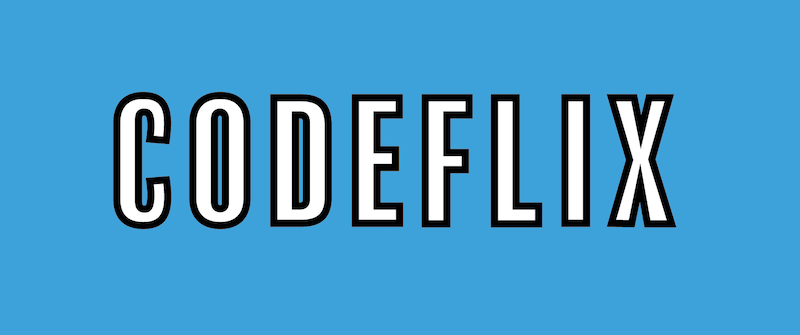

Create a profile: t
What is the name of the new user? t
Users: 
T
Choose a user: t

            What would you like to do?
            
            [0] Check - Ratings 
            
            [1] Search - Search for shows and it to watch list
            
            [2] Watch - Pick something from your watchlist
            
            [3] Add - add a new user
            
            [4] Display - show watch lists
            
            [5] Quit - close the application
            
            
            
What would you like to do? Enter the number to select the options: 0
Enter the movie/TV show name to know the rating:  naruto
Naruto has 220 episodes
Naruto has a rating of 8.3


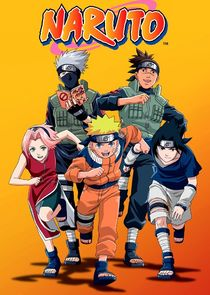

naruto has a rating of 8.3
would you like to add naruto  to your watchlist? Enter y/n: y
Naruto has been added to the watchlist!
What would you like to do? Enter the number to select the options: 0
Enter the movie/TV show name to know the rating:  vikings
Vikings has 89 episodes
Vikings has a rating of 8.6


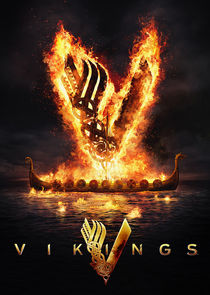

vikings has a rating of 8.6
would you like to add vikings  to your watchlist? Enter y/n: y
Vikings has been added to the watchlist!
What would you like to do? Enter the number to select the options: 
Invalid input: please choose from the list!
What would you like to do? Enter the number to select the options: 0
Enter the movie/TV show name to know the rating:  vikgins
Flipping Virgins has 25 episodes
Flipping Virgins has a rating of None


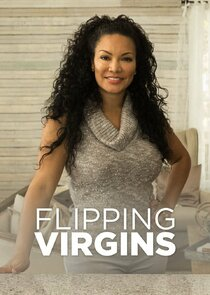

vikgins has a rating of None
would you like to add vikgins  to your watchlist? Enter y/n: y
Flipping Virgins has been added to the watchlist!
What would you like to do? Enter the number to select the options: 4
['naruto', 'vikings', 'vikgins']


KeyboardInterrupt: Interrupted by user

In [48]:
codeflix = Theater()
codeflix.run()

In [49]:
#1 No duplicates in user name (add_user)

#2 Give users option to show their saved watchlists (display_watch_list)

#3 change the options selections into numbers so it is shorter and easier to input. (def run())

#give the user option to add the show to the watchlist after searching insteading of automaticcaly adding it after
#searching 

#give users option to check for any movie ratings 

#give useres option to check ratings of any show by hittting selction(0)